In [2]:
from __future__ import print_function
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
def apply_color_map(image_array, labels):
    color_array = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)

    for label_id, label in enumerate(labels):
        # set all pixels with the current label to the color of the current label
        color_array[image_array == label_id] = label["color"]

    return color_array

In [4]:
# a nice example
key = '_7zhntDU5r1EmkFSuzKxaQ'

# read in config file
with open('config.json') as config_file:
    config = json.load(config_file)
# in this example we are only interested in the labels
labels = config['labels']

print("mapping: ", config["mapping"])
print("version: ", config["version"])
print("folder_structure:", config["folder_structure"])
print("There are {} labels in the config file".format(len(labels)))

mapping:  public
version:  1.0
folder_structure: {split}/{content}/{key:.{22}}.{ext}
There are 66 labels in the config file


We provide pixel-wise labels based on polygon annotations for 66 object classes, where 37 are annotated in an instance-specific manner (i.e. individual instances are labeled separately). 

In [5]:
for label_id, label in enumerate(labels):
    print("{:>30} ({:2d}): {:<50} has instances: {}".format(label["readable"], label_id, label["name"], label["instances"]))

                          Bird ( 0): animal--bird                                       has instances: True
                 Ground Animal ( 1): animal--ground-animal                              has instances: True
                          Curb ( 2): construction--barrier--curb                        has instances: False
                         Fence ( 3): construction--barrier--fence                       has instances: False
                    Guard Rail ( 4): construction--barrier--guard-rail                  has instances: False
                       Barrier ( 5): construction--barrier--other-barrier               has instances: False
                          Wall ( 6): construction--barrier--wall                        has instances: False
                     Bike Lane ( 7): construction--flat--bike-lane                      has instances: False
             Crosswalk - Plain ( 8): construction--flat--crosswalk-plain                has instances: True
                      

In [8]:
for label_id, label in enumerate(labels):
    if(label["instances"]):
             print(label["readable"])

Bird
Ground Animal
Crosswalk - Plain
Person
Bicyclist
Motorcyclist
Other Rider
Lane Marking - Crosswalk
Banner
Bench
Bike Rack
Billboard
Catch Basin
CCTV Camera
Fire Hydrant
Junction Box
Mailbox
Manhole
Phone Booth
Street Light
Pole
Traffic Sign Frame
Utility Pole
Traffic Light
Traffic Sign (Back)
Traffic Sign (Front)
Trash Can
Bicycle
Boat
Bus
Car
Caravan
Motorcycle
Other Vehicle
Trailer
Truck
Wheeled Slow


In [5]:
# set up paths for every image
image_path = "training/images/{}.jpg".format(key)
label_path = "training/labels/{}.png".format(key)
instance_path = "training/instances/{}.png".format(key)

In [6]:
# load images
base_image = Image.open(image_path)
label_image = Image.open(label_path)
instance_image = Image.open(instance_path)

In [7]:
# convert labeled data to numpy arrays for better handling
label_array = np.array(label_image)

# for visualization, we apply the colors stored in the config
colored_label_array = apply_color_map(label_array, labels)

In [8]:
r = 1050
c = 3600
print('Pixel at [{}, {}] is: {}'.format(r, c, labels[label_array[r, c]]['readable']))

Pixel at [1050, 3600] is: Building


In [9]:
# convert labeled data to numpy arrays for better handling
instance_array = np.array(instance_image, dtype=np.uint16)

# now we split the instance_array into labels and instance ids
instance_label_array = np.array(instance_array / 256, dtype=np.uint8)
colored_instance_label_array = apply_color_map(instance_label_array, labels)

# instance ids
instance_ids_array = np.array(instance_array % 256, dtype=np.uint8)

In [10]:
a = np.array([[1, 2, 3], [3, 2, 1], [4, 3, 2]])
m = np.zeros((3, 3))
m[a == 1] = 1
print(m)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [18]:
instances = np.unique(instance_array)
class_ids = instances // 256

instaces_count = instances.shape[0]
classes_id_count = np.unique(class_ids).shape[0]

mask = np.zeros([instance_array.shape[0], instance_array.shape[1], instaces_count], dtype=np.uint8)
print("There are {} masks, {} classes in this image".format(instaces_count, classes_id_count))

There are 80 masks, 21 classes in this image


In [19]:
for i in range(instaces_count):
    m = np.zeros((instance_array.shape[0], instance_array.shape[1]))
    m[instance_array == instances[i]] = 1
    mask[:, :, i] = m
    print('New mask {} created: instance {} of class {}'.format(i, instances[i], labels[class_ids[i]]["readable"]))

New mask 0 created: instance 512 of class Curb
New mask 1 created: instance 768 of class Fence
New mask 2 created: instance 3328 of class Road
New mask 3 created: instance 3840 of class Sidewalk
New mask 4 created: instance 4352 of class Building
New mask 5 created: instance 4864 of class Person
New mask 6 created: instance 4865 of class Person
New mask 7 created: instance 6144 of class Lane Marking - General
New mask 8 created: instance 6912 of class Sky
New mask 9 created: instance 7424 of class Terrain
New mask 10 created: instance 7680 of class Vegetation
New mask 11 created: instance 8960 of class Billboard
New mask 12 created: instance 8961 of class Billboard
New mask 13 created: instance 9728 of class Fire Hydrant
New mask 14 created: instance 9729 of class Fire Hydrant
New mask 15 created: instance 9730 of class Fire Hydrant
New mask 16 created: instance 9984 of class Junction Box
New mask 17 created: instance 11264 of class Street Light
New mask 18 created: instance 11265 of c

In [12]:
r = 2700
c = 1000
print('Pixel at [{}, {}] is labelled: {}, instance: {}'.format(r, c, labels[instance_label_array[r, c]]['readable'], instance_ids_array[r, c]))

Pixel at [2700, 1000] is labelled: Road, instance: 0


[ 2  3 13 15 17 19 19 24 27 29 30 35 35 38 38 38 39 44 44 44 44 44 44 44
 44 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 47 47 47 47 47 47 47 47
 47 47 47 48 48 48 48 48 48 50 50 50 50 50 50 50 55 55 55 55 55 55 55 55
 55 55 55 55 55 61 61 65]
Mask 52: instance12289 of class Traffic Light


Text(0.5,1,'Traffic Light')

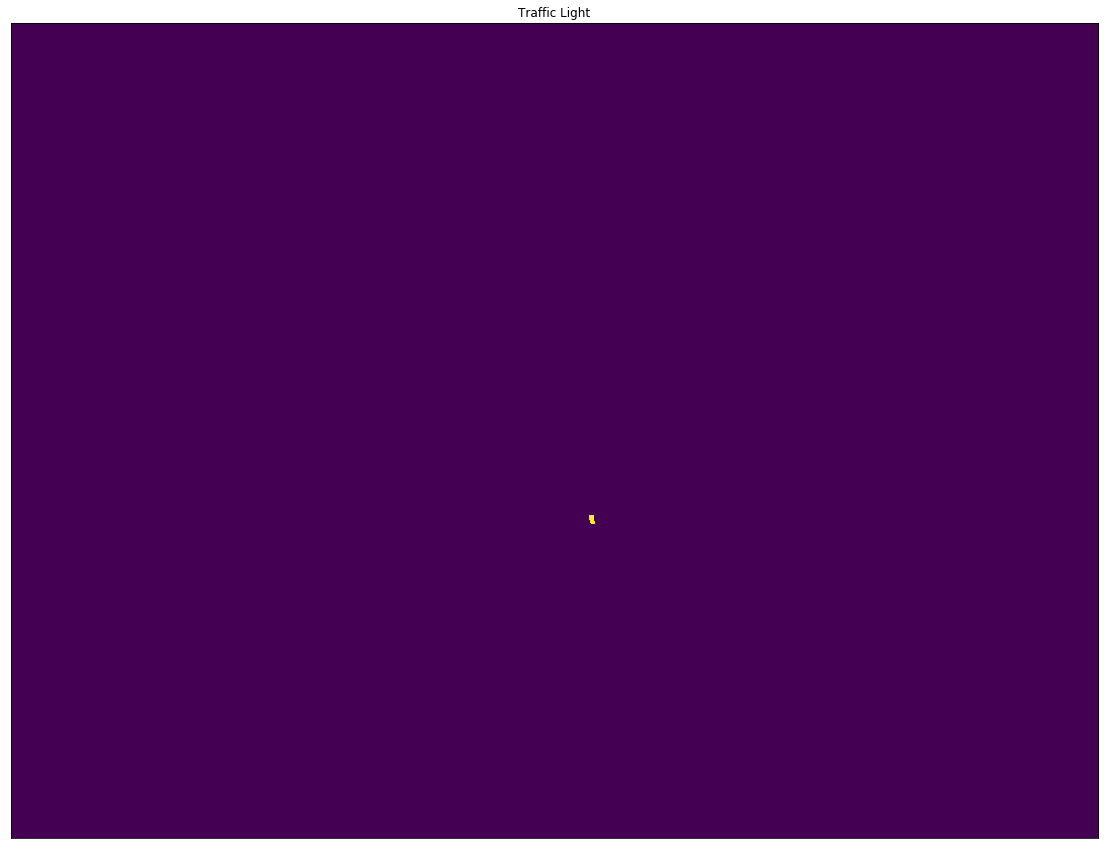

In [22]:
print(class_ids)
# plot a mask
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

n = 52
ins = instances[n]
print('Mask {}: instance{} of class {}'.format(n, ins, labels[ins//256]["readable"]))

ax.imshow(mask[:, :, n])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title(labels[ins//256]["readable"])

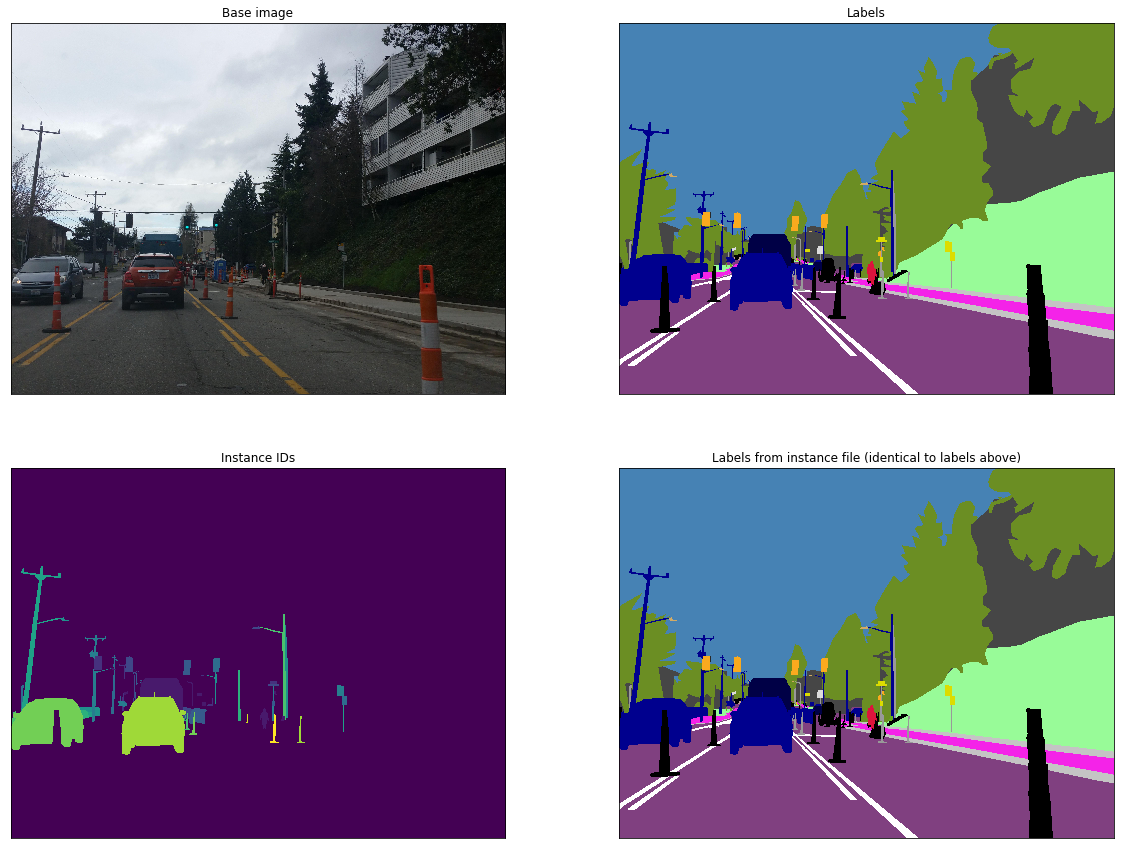

In [13]:
# plot the result
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax[0][0].imshow(base_image)
ax[0][0].get_xaxis().set_visible(False)
ax[0][0].get_yaxis().set_visible(False)
ax[0][0].set_title("Base image")

ax[0][1].imshow(colored_label_array)
ax[0][1].get_xaxis().set_visible(False)
ax[0][1].get_yaxis().set_visible(False)
ax[0][1].set_title("Labels")

ax[1][0].imshow(instance_ids_array)
ax[1][0].get_xaxis().set_visible(False)
ax[1][0].get_yaxis().set_visible(False)
ax[1][0].set_title("Instance IDs")

ax[1][1].imshow(colored_instance_label_array)
ax[1][1].get_xaxis().set_visible(False)
ax[1][1].get_yaxis().set_visible(False)
ax[1][1].set_title("Labels from instance file (identical to labels above)")

fig.savefig('MVD_plot.png')